# Thermal Data for Vulcan Sabancaya, Peru


### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this is a .py file containing helper functions used to plot figures in this notebook
import thermal

### Loading Data
The file specified in 'path' below contains thermal, spatial, and quantitative information about hot spot detection at Sabancaya, using SWIR SENTINEL2 MSI satellite images.

In [2]:
# csv file containing thermal data
path = '../data/sabancaya/hotspot-data/S2_HotSpot_Sabancaya/S2_HotSpot_Sabancaya.csv'

# read csv data file into dataframe df
df = pd.read_csv(path)

# establish dates as indices of the dataframe
df.set_index('Date', inplace=True)

### First Glance
Part of the dataframe containing our thermal data is shown below.

In [3]:
df.head()

,N Hot Pixel,meanTI,maxTI,maxDist,maxDist Summit,N Hot Pixel Summit,N Cluster
Date,,,,,,,
03-Sep-2015 14:57:11,0,NaN,NaN,NaN,NaN,0,0
02-Dec-2015 15:09:33,0,NaN,NaN,NaN,NaN,0,0
01-Jan-2016 15:09:22,2,0.78095,0.8445,60.0,60.0,2,2
01-Mar-2016 15:02:41,0,NaN,NaN,NaN,NaN,0,0
31-Mar-2016 14:59:54,0,NaN,NaN,NaN,NaN,0,0


The important variables are:
- N Hot Pixel: Number of hot pixels in the (10 x 10 km) satellite image used to collect the data.

- N Cluster: Number of clusters of hot pixels in the image. This and N Hot Pixel are used to show heating in the image.
- meanTI: Thermal index of hot pixels in the image. Thermal index is a rough estimate of the temperature increase in a region. It is used here because satellite imagery fails to get actual temperature.

Below is a preliminary plot of the Mean Thermal Index

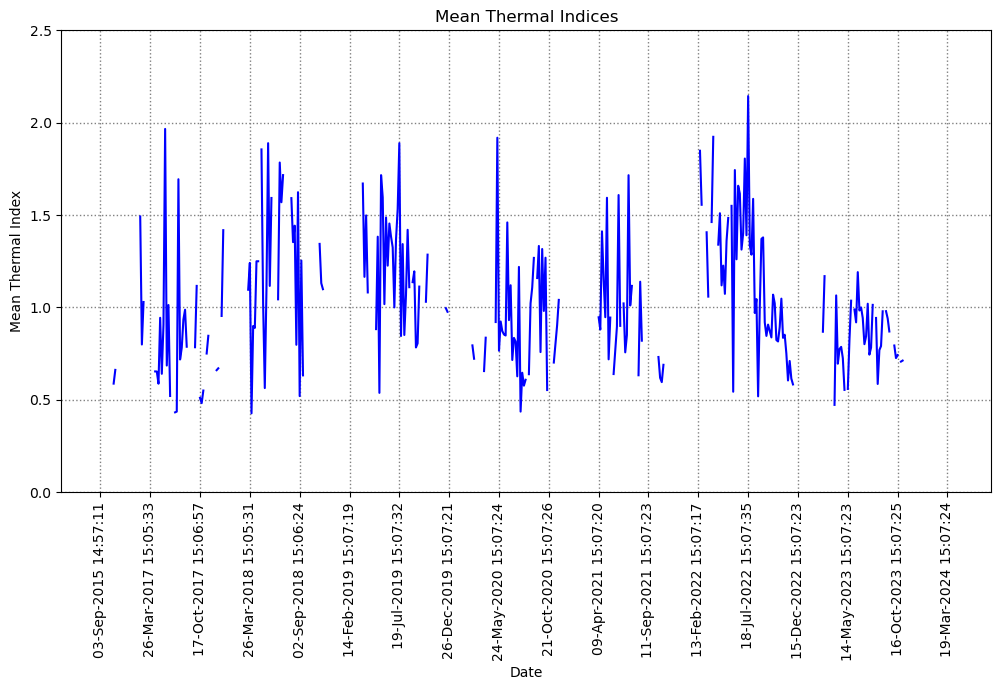

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['meanTI'], c='b')
plt.title('Mean Thermal Indices')
plt.xticks(rotation=90)
plt.ylim(0.0, 2.5)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xlabel('Date')
plt.ylabel('Mean Thermal Index')
plt.grid(color='gray', lw=1, ls='dotted')
plt.show()

From this plot, several spikes in Thermal Index can be identified. These could indicate heating in the area around Sabancaya - perhaps signaling further volcanic activity. However, further cleaning and processing will be needed to account for missing data (NaNs) and outliers.

# Monthly Averages
Monthly averages of certain variables are used to remove NaNs and account for any outliers. Below is a plot showing the monthly average of the Mean Thermal Indices.

C:\Users\sahny\work\classes\GPGN268\SP2024-FP06-volcano\notebooks\thermal.py:88: RuntimeWarning: Mean of empty slice
  A[m0] = np.nanmean(var_list)


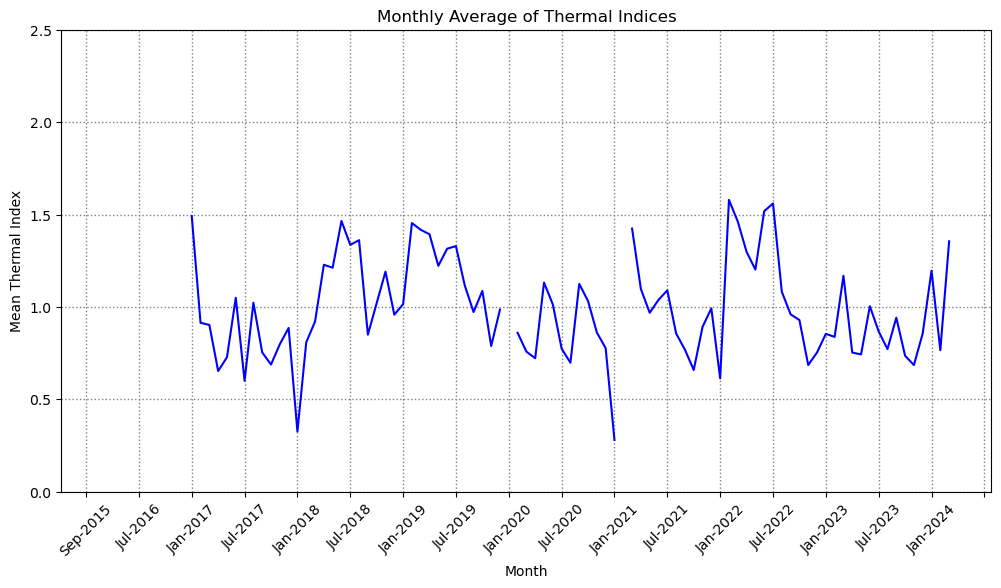

In [6]:
plt.figure(figsize=(12,6))
plt.plot(thermal.monthly_avg(df, 'meanTI'), c='b')
plt.title('Monthly Average of Thermal Indices')
plt.xticks(rotation=45)
plt.ylim(0.0, 2.5)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.xlabel('Month')
plt.ylabel('Mean Thermal Index')
plt.grid(color='gray', lw=1, ls='dotted')
plt.show()

The next plot below shows the monthly average of the number of hot pixels and the number of clusters.

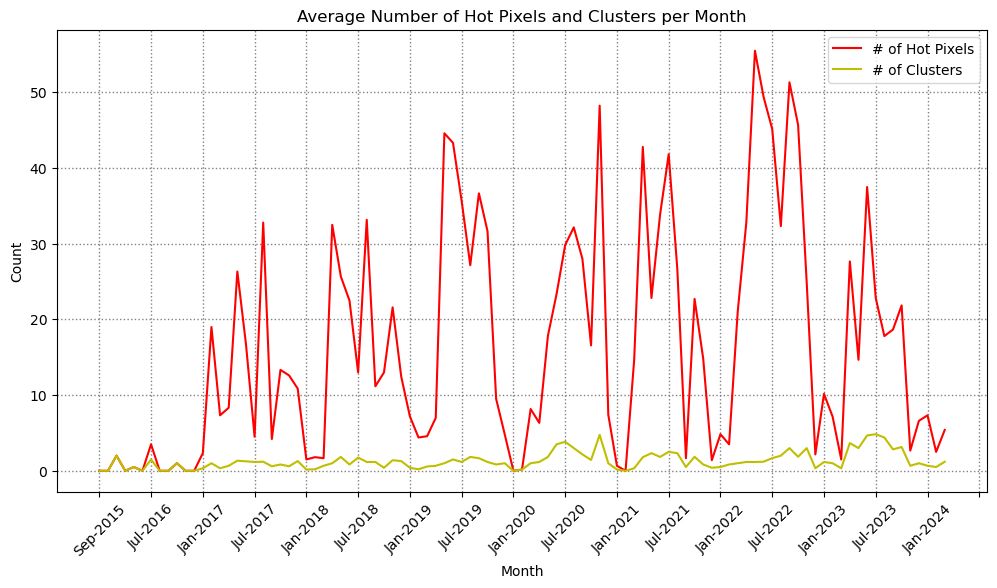

In [8]:
plt.figure(figsize=(12,6))
plt.plot(thermal.monthly_avg(df, 'N Hot Pixel'), c='r', label='# of Hot Pixels')
plt.plot(thermal.monthly_avg(df, 'N Cluster'), c='y', label='# of Clusters')
plt.title('Average Number of Hot Pixels and Clusters per Month')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(color='gray', lw=1, ls='dotted')
plt.legend()
plt.show()

In this plot, Number of Hot Pixels (red) and Number of Clusters (yellow) appear to increase at the same time. Changes in number of clusters are less visible because there are far fewer clusters than there are hot pixels. However, this association indicates that hot pixels tend to appear in clusters, suggesting that heating does not happen in small, scattered pockets, but rather over larger areas of the region imaged by the MIROVA satellite. Unfortunately, our analysis is limited by the fact that the dataset used here does not include any spatial dimension, preventing us from looking at where clusters occur. We at least know that heating happens in large, distinct clusters.